# Generate a table from the evaluation metrics


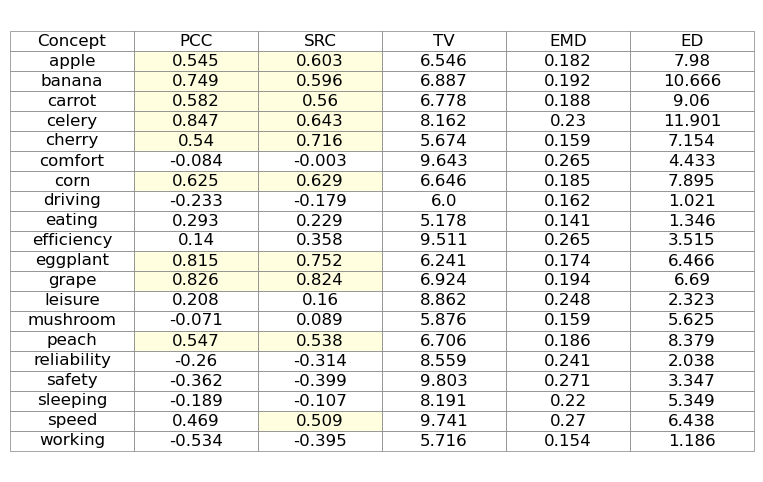

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Step 1: Read the data
file_path = './output/evaluation_metrics/ViT_B_32/test_1_metrics/evaluation_metrics_df.txt'
df = pd.read_csv(file_path, index_col=0)
# Round the values to 3 decimal places
df = df.round(3)
# Update the header for the column 'word' to be 'concept'
df = df.rename(columns={'word': 'Concept'})

# Step 2: Create the table
fig, ax = plt.subplots(figsize=(8, 6))  # Set the size of the figure
ax.axis('tight')
ax.axis('off')

# Create the table
table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')

# Customize the table
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)  # Adjust the scale of the table

# Set all borders to grey with a linewidth of 0.5
for key, cell in table.get_celld().items():
    cell.set_edgecolor('grey')
    cell.set_linewidth(0.5)
    cell.PAD = 0.1  # Add padding around the results

# Highlight PCC and SRC cells with yellow if the value is greater than 0.5
for i in range(len(df)):
    for j, col in enumerate(df.columns):
        if col in ['PCC', 'SRC'] and df.iloc[i, j] > 0.5:
            table[(i + 1, j)].set_facecolor(mcolors.CSS4_COLORS['lightyellow'])

# Step 3: Save the table as an image
plt.savefig('./output/evaluation_metrics/ViT_B_32/test_1_metrics/evaluation_metrics_table.png', format='png', dpi=300)
plt.show()

maybe recreate table of correlation comparisons across papers:
see page 7 of: https://arxiv.org/pdf/2406.17781

Category Hu et al. [25]  GPT-4 (current study)
Apple .69  .90
Banana .88  .84
Carrot .82  .75
Celery .77  .87
Cherry .62  .82
Corn .81  .83
Eggplant .49  .71
Grape .12  .69
Mushroom .54  .76
Peach .86  .90


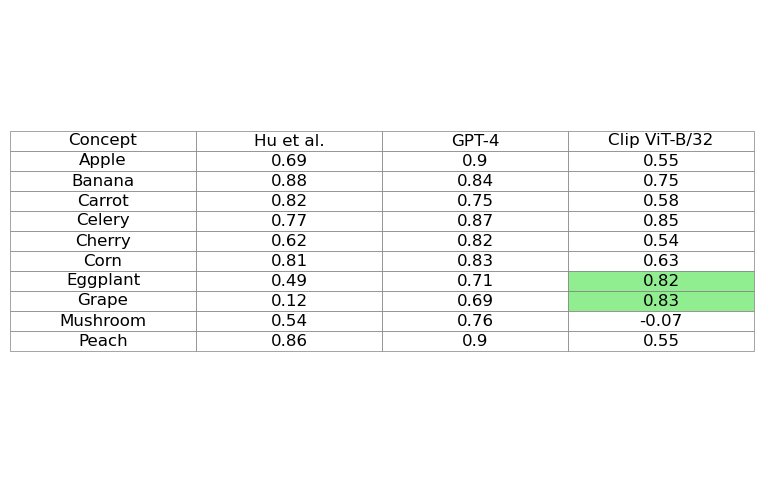

In [ ]:
# create a df of concept, Hu et al.,  GPT-4, ViT-B/32

compare_r_vals = pd.DataFrame(columns=['Concept', 'Hu et al.', 'GPT-4', 'Clip ViT-B/32'])
concept_overlap = ['Apple', 'Banana', 'Carrot', 'Celery', 'Cherry', 'Corn', 'Eggplant', 'Grape', 'Mushroom', 'Peach']
hu_et_al = [0.69, 0.88, 0.82, 0.77, 0.62, 0.81, 0.49, 0.12, 0.54, 0.86]
gpt_4 = [0.90, 0.84, 0.75, 0.87, 0.82, 0.83, 0.71, 0.69, 0.76, 0.90]
clip = [0.55, 0.75, 0.58, 0.85, 0.54, 0.63, 0.82, 0.83, -.07, 0.55]

#update the df
compare_r_vals['Concept'] = concept_overlap
compare_r_vals['Colorization'] = hu_et_al
compare_r_vals['GPT-4'] = gpt_4
compare_r_vals['Clip ViT-B/32'] = clip

# Step 4: Create the table
fig, ax = plt.subplots(figsize=(8, 6))  # Set the size of the figure
ax.axis('tight')
ax.axis('off')

# Create the table
table = ax.table(cellText=compare_r_vals.values, colLabels=compare_r_vals.columns, cellLoc='center', loc='center')

# Customize the table
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)  # Adjust the scale of the table

# Set all borders to grey with a linewidth of 0.5
for key, cell in table.get_celld().items():
    cell.set_edgecolor('grey')
    cell.set_linewidth(0.5)
    cell.PAD = 0.1  # Add padding around the results
    
# Highlight cells where Clip ViT-B/32 outperforms Hu et al. and GPT-4
for i in range(len(compare_r_vals)):
    if compare_r_vals.iloc[i, 3] >= compare_r_vals.iloc[i, 1] and compare_r_vals.iloc[i, 3] >= compare_r_vals.iloc[i, 2]:
        table[(i + 1, 3)].set_facecolor(mcolors.CSS4_COLORS['lightgreen'])

# show the table
#plt.savefig('./output/evaluation_metrics/ViT_B_32/test_1_metrics/concept_overlap_table.png', format='png', dpi=300)

plt.show()

# plot regular bar chart with corresponding colors


In [34]:
colors = pd.read_csv("./data/UW_71_color_dict.csv", index_col=0)
colors.keys()


Index(['hex', 'index'], dtype='object')

In [20]:
# get the predicted results
results_fp = "./output/cosine_similarities/ViT_B_32/test_1_scores/similarity_scores_df.txt"

pred_scores = pd.read_csv(results_fp, index_col=0)
pred_scores = pred_scores.round(4)
pred_scores

,1,2,3,4,5,6,7,8,9,10,...,62,63,64,65,66,67,68,69,70,71
apple,0.2863,0.2839,0.2889,0.2877,0.2724,0.2767,0.2861,0.2826,0.2819,0.2868,...,0.2913,0.2883,0.3086,0.3089,0.3132,0.2965,0.3035,0.2897,0.2862,0.2760
banana,0.2625,0.2623,0.2691,0.2678,0.2550,0.2577,0.2650,0.2620,0.2612,0.2712,...,0.2591,0.2623,0.2785,0.2821,0.2954,0.2847,0.2997,0.2997,0.3004,0.2803
carrot,0.2683,0.2766,0.2832,0.2823,0.2575,0.2694,0.2810,0.2795,0.2782,0.2787,...,0.3079,0.2735,0.2970,0.2975,0.2975,0.2822,0.2869,0.2759,0.2716,0.2904
celery,0.2571,0.2565,0.2621,0.2619,0.2520,0.2530,0.2602,0.2525,0.2535,0.2655,...,0.2630,0.2588,0.3188,0.3209,0.3258,0.3005,0.3067,0.2593,0.2591,0.2477
cherry,0.2744,0.2809,0.2816,0.2885,0.2649,0.2759,0.2829,0.2860,0.2809,0.2944,...,0.2889,0.2938,0.2909,0.2906,0.2930,0.2795,0.2857,0.2766,0.2741,0.2610
comfort,0.2791,0.2871,0.2934,0.2934,0.2609,0.2751,0.2901,0.2893,0.2885,0.2877,...,0.2788,0.2721,0.2864,0.2822,0.2902,0.2745,0.2842,0.2859,0.2788,0.2685
corn,0.2569,0.2583,0.2603,0.2628,0.2535,0.2545,0.2587,0.2624,0.2563,0.2628,...,0.2685,0.2664,0.2840,0.2830,0.2879,0.2763,0.2835,0.2804,0.2805,0.2736
driving,0.2779,0.2859,0.2849,0.2890,0.2701,0.2778,0.2821,0.2890,0.2817,0.2858,...,0.2806,0.2829,0.2877,0.2853,0.2885,0.2790,0.2874,0.2836,0.2826,0.2744
eating,0.2725,0.2791,0.2820,0.2822,0.2632,0.2745,0.2823,0.2819,0.2770,0.2797,...,0.2819,0.2764,0.2881,0.2880,0.2910,0.2826,0.2868,0.2824,0.2809,0.2735
efficiency,0.2810,0.2861,0.2878,0.2865,0.2709,0.2799,0.2885,0.2851,0.2821,0.2828,...,0.2816,0.2772,0.2892,0.2893,0.2918,0.2838,0.2877,0.2867,0.2828,0.2753


In [68]:
# get the max value and min value within pred_scores
max_val = pred_scores.max().max()
min_val = pred_scores.min().min()
print(f"Max value: {max_val}")
print(f"Min value: {min_val}")

print(f"Difference between max and min: {max_val - min_val}")

Max value: 0.3258
Min value: 0.2255
Difference between max and min: 0.10029999999999997


{'hex': '#ffffff', 'index': 29}


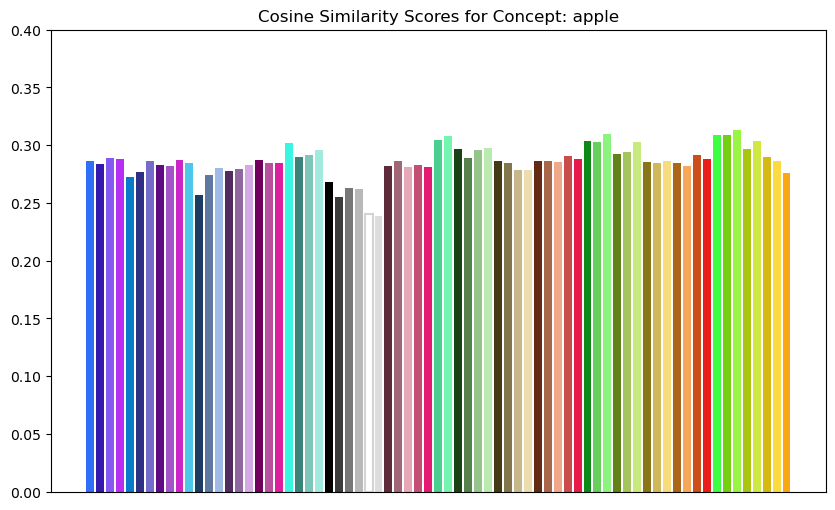

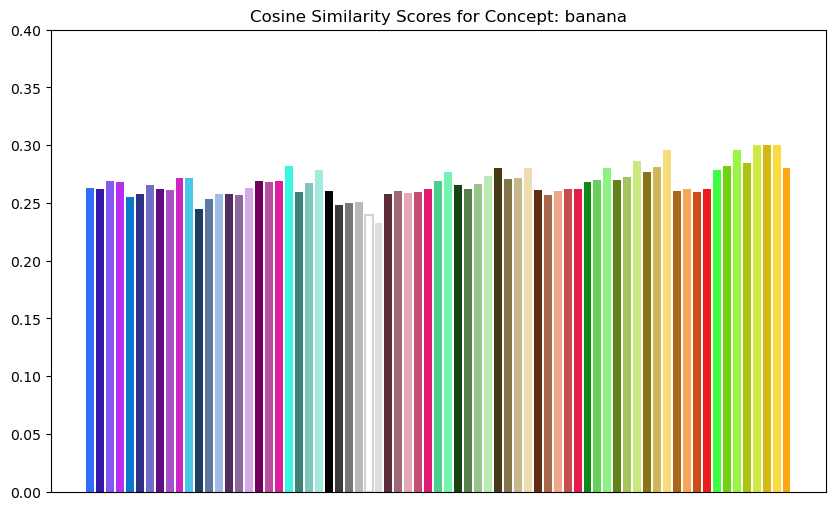

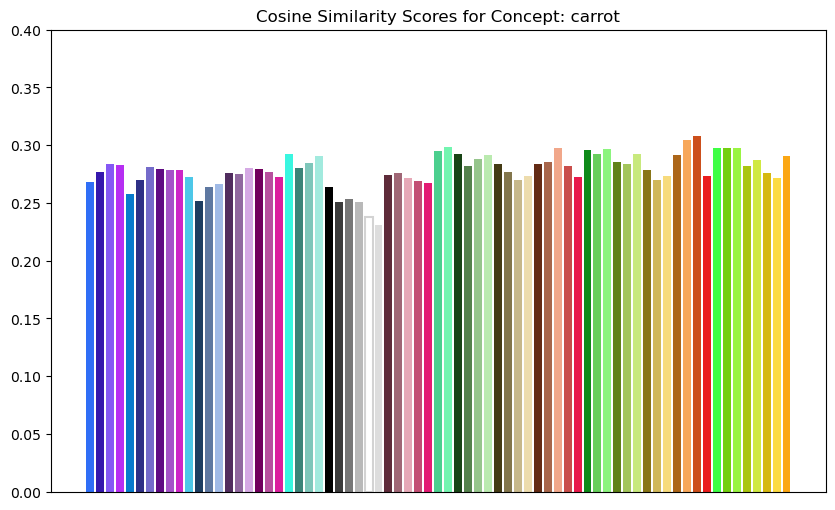

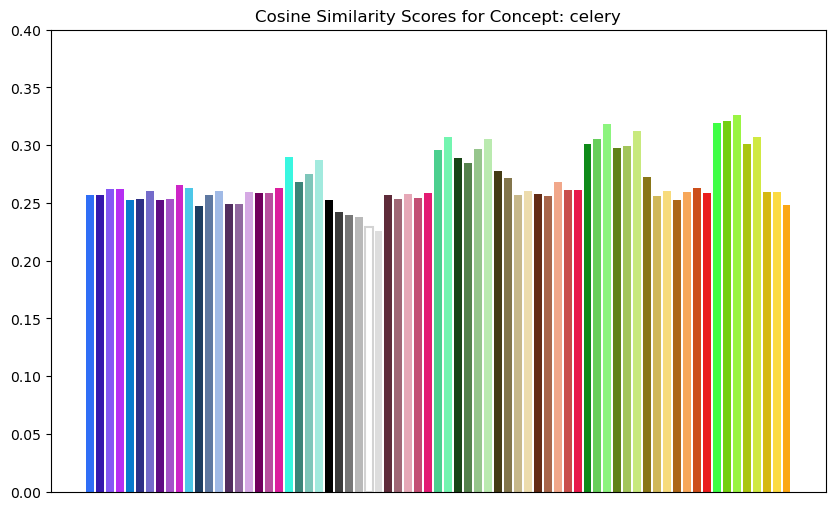

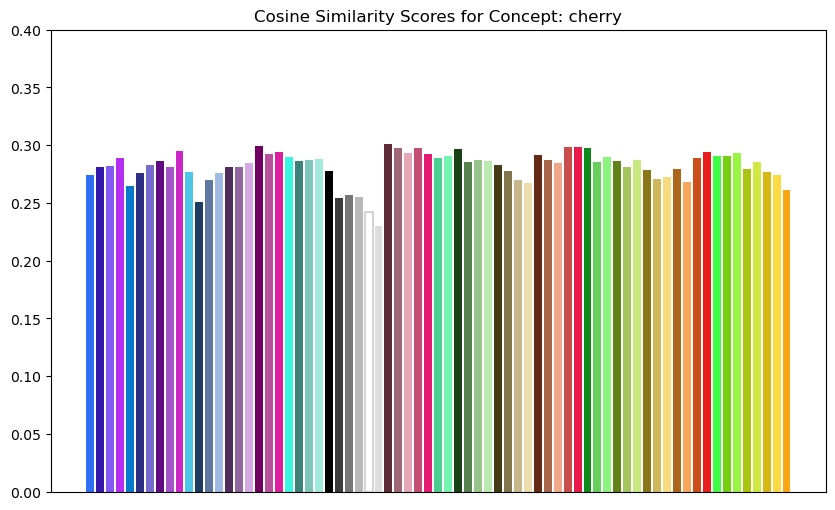

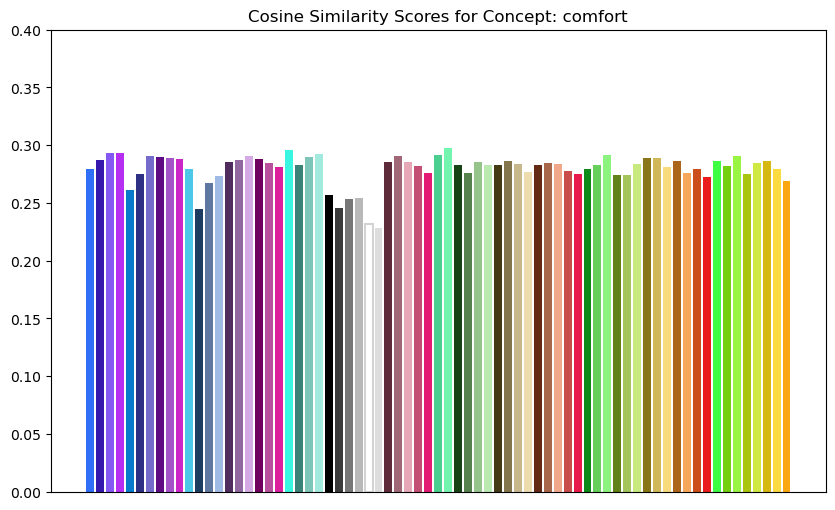

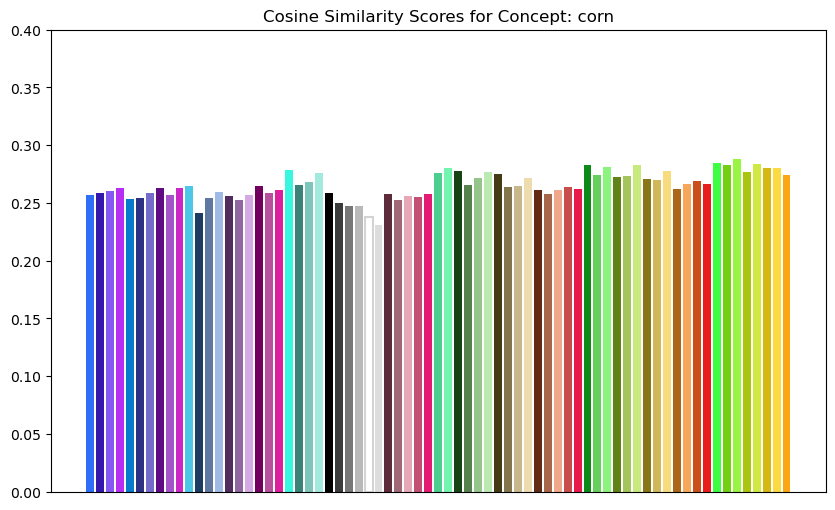

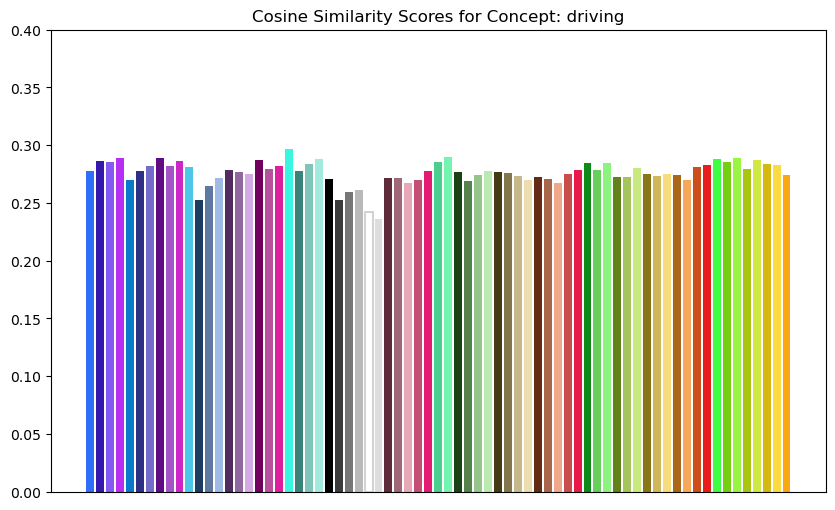

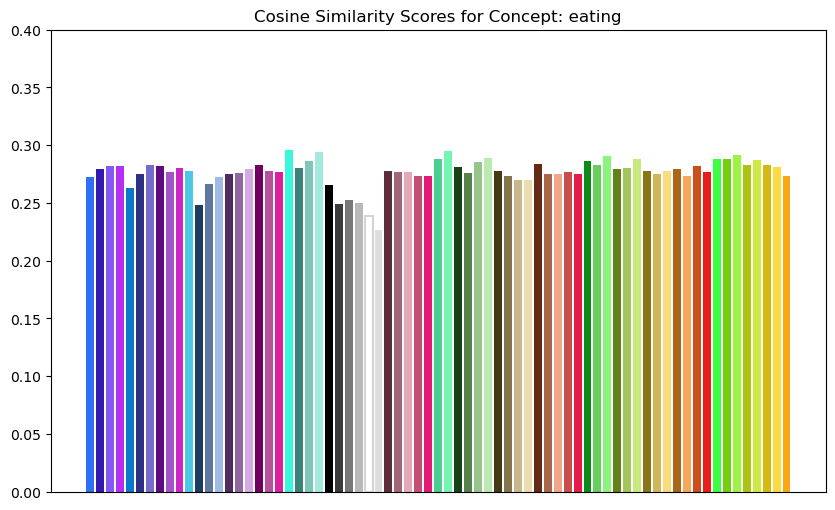

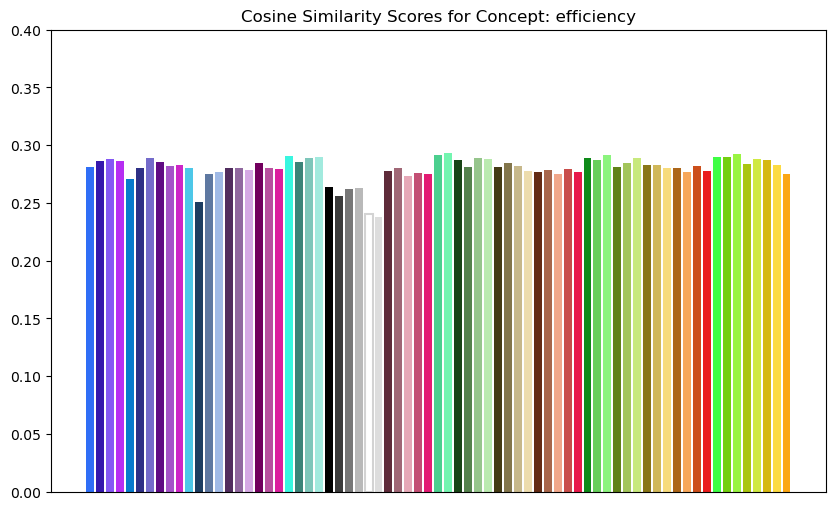

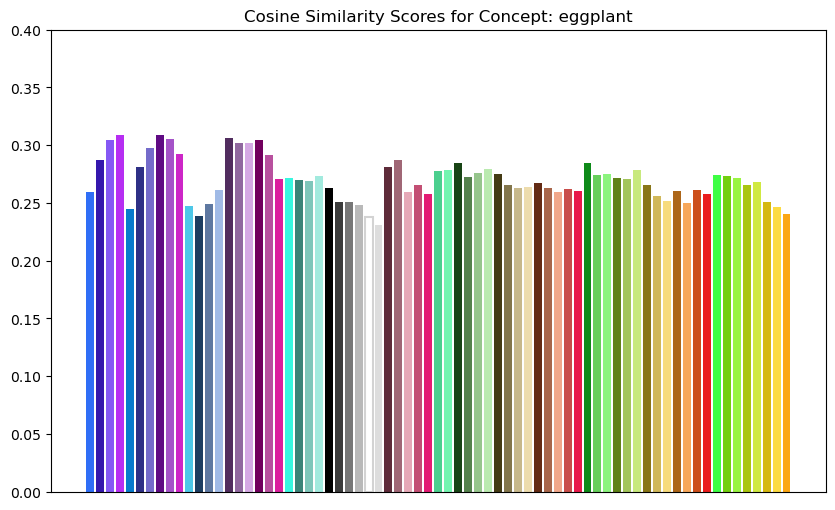

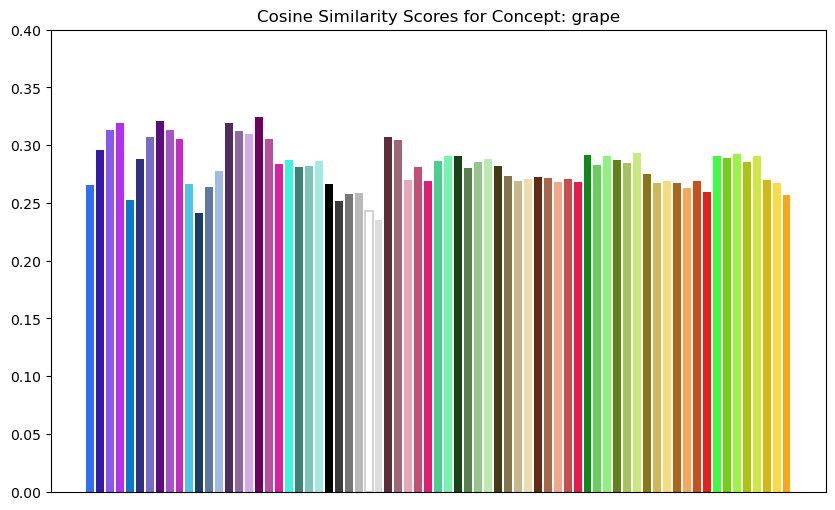

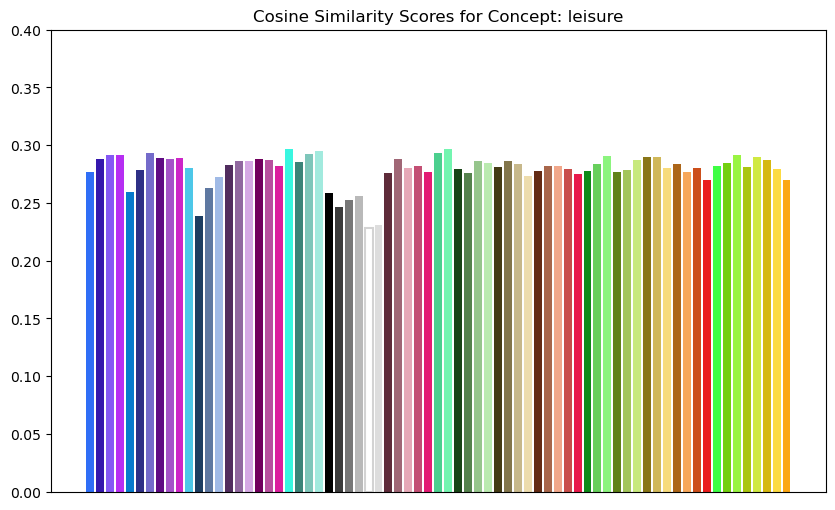

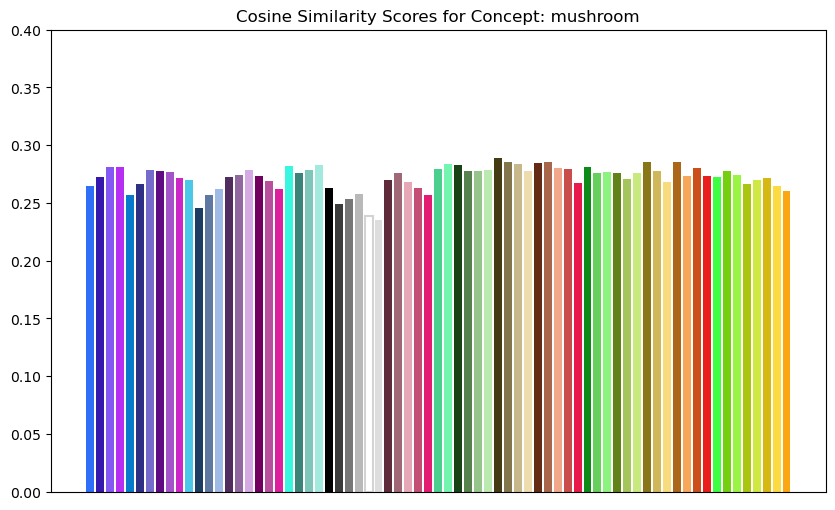

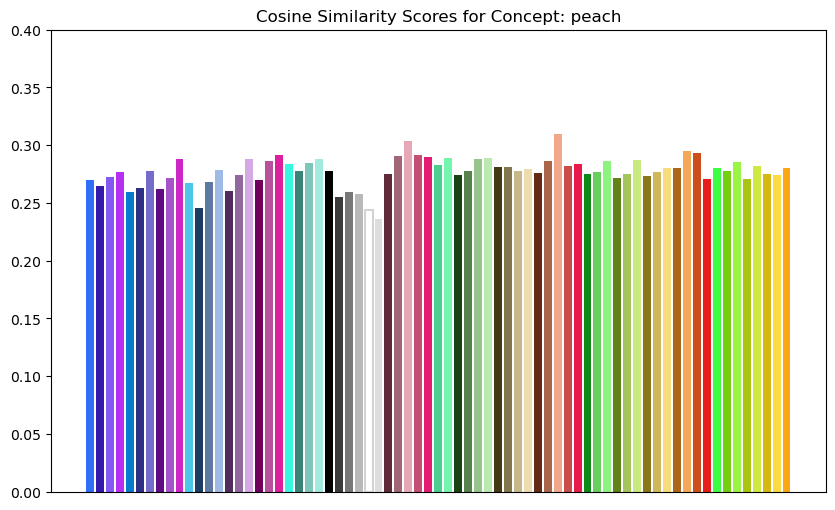

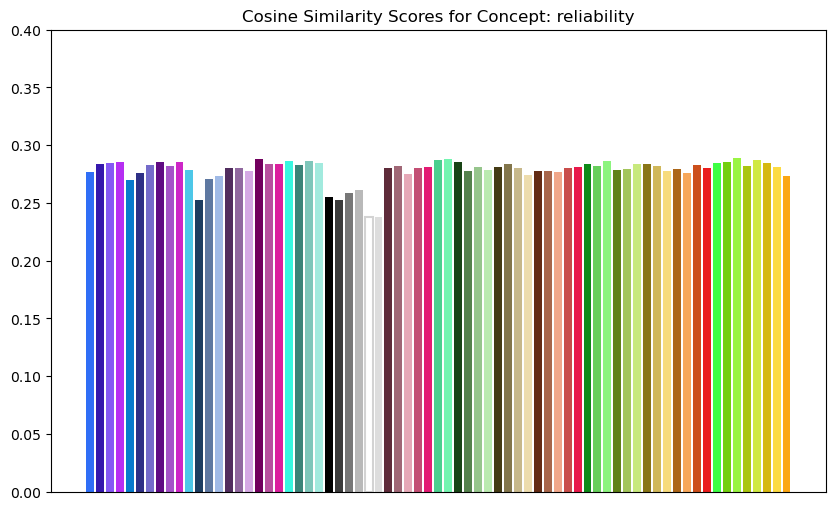

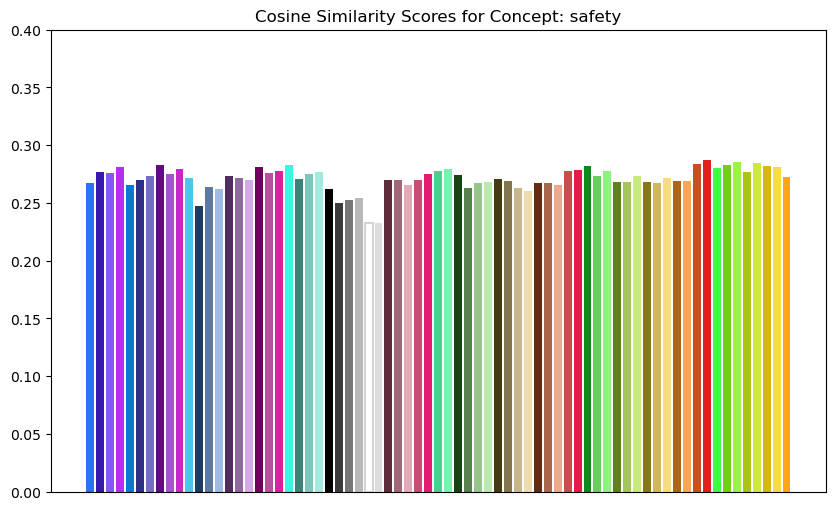

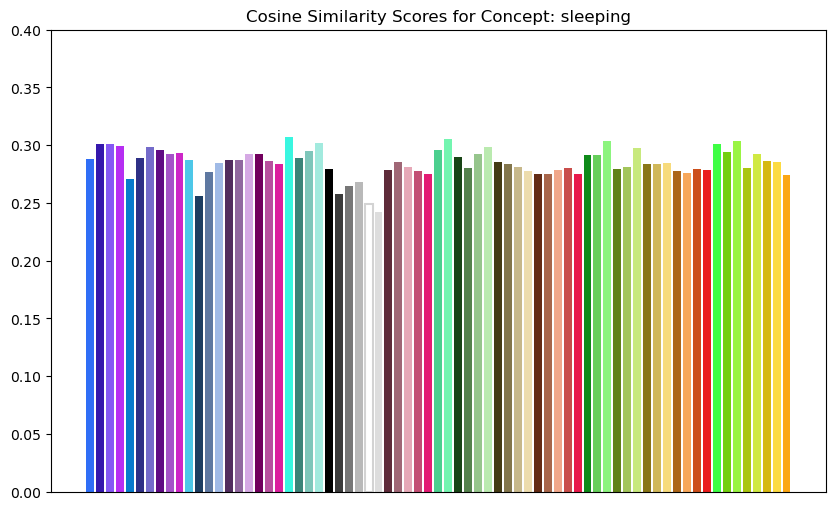

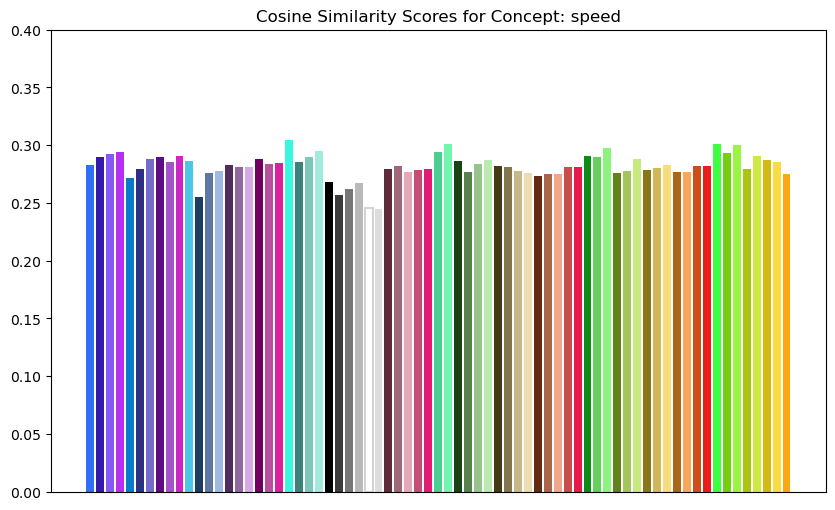

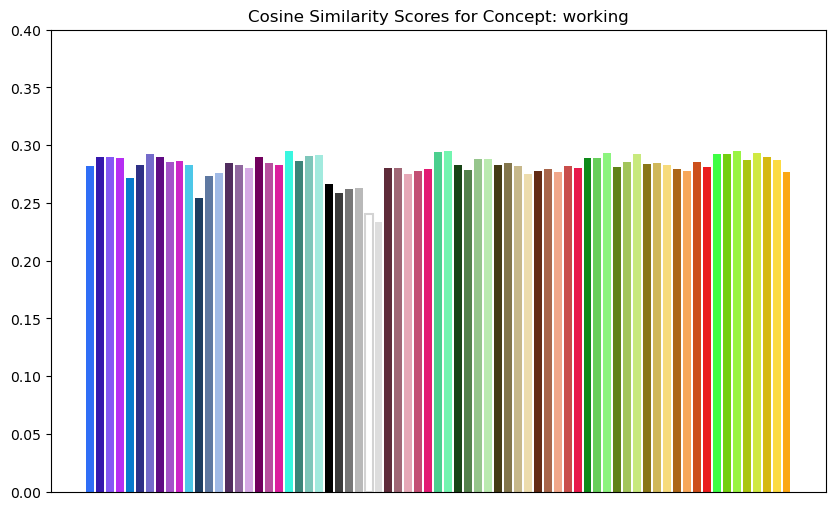

In [66]:
import matplotlib.pyplot as plt
# for each concept plot the similarity scores on a bar chart
# the color of each bar should be determined by the column which should match key in colors df
# no legend on the x axis 
# title should be the concept

# lets just turn the colors df into a dictionary
color_dict = colors.to_dict(orient='index')
print(color_dict[29])

for concept in pred_scores.index:
    plt.figure(figsize=(10, 6))
    bar_colors = [color_dict[int(col)]['hex'] for col in pred_scores.columns]
    bars = plt.bar(pred_scores.columns, pred_scores.loc[concept], color=bar_colors)
    
    # Add outline to bars with color #ffffff
    for bar, color in zip(bars, bar_colors):
        if color == '#ffffff':
            bar.set_edgecolor('lightgrey')
            bar.set_linewidth(1.5)
    
    plt.ylim(0, .4)  # Set y-axis range from 0 to 1
    plt.xticks([])  # Remove x-axis tick marks
    plt.xlabel('')  # Remove x-axis label
    plt.title(f'Cosine Similarity Scores for Concept: {concept}')
    plt.show()